<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploración-de-datos" data-toc-modified-id="Exploración-de-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploración de datos</a></span></li><li><span><a href="#Modelos-predictivos" data-toc-modified-id="Modelos-predictivos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modelos predictivos</a></span><ul class="toc-item"><li><span><a href="#Monta-un-modelo-con-un-solo-predictor:-HouseAge" data-toc-modified-id="Monta-un-modelo-con-un-solo-predictor:-HouseAge-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Monta un modelo con un solo predictor: <code>HouseAge</code></a></span></li><li><span><a href="#Monta-un-modelo-con-un-solo-predictor:-MedInc" data-toc-modified-id="Monta-un-modelo-con-un-solo-predictor:-MedInc-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Monta un modelo con un solo predictor: <code>MedInc</code></a></span></li><li><span><a href="#Monta-un-modelo-con-los-3-predictores-MedInc,-HouseAge,-AveRooms" data-toc-modified-id="Monta-un-modelo-con-los-3-predictores-MedInc,-HouseAge,-AveRooms-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Monta un modelo con los 3 predictores <code>MedInc</code>, <code>HouseAge</code>, <code>AveRooms</code></a></span></li><li><span><a href="#Monta-un-modelo-con-todas-las-variables-como-predictoras" data-toc-modified-id="Monta-un-modelo-con-todas-las-variables-como-predictoras-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Monta un modelo con todas las variables como predictoras</a></span></li></ul></li><li><span><a href="#Train/test-split" data-toc-modified-id="Train/test-split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train/test split</a></span><ul class="toc-item"><li><span><a href="#Monta-un-modelo-con-todas-las-variables-como-predictoras-y-utilizando-el-paradigma-train/test-split" data-toc-modified-id="Monta-un-modelo-con-todas-las-variables-como-predictoras-y-utilizando-el-paradigma-train/test-split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Monta un modelo con todas las variables como predictoras y utilizando el paradigma train/test split</a></span></li></ul></li></ul></div>

# Regresión lineal: práctica y ejercicios

**NOTAS**
 - Hay muchas formas de resolver cada problema, encuentra la tuya.
 - Crea las celdas extra que necesites.
 - Recuerda que una celda puede ser de tipo Código, o de tipo Markdown. Utiliza las segundas para escribir texto y explicaciones si lo precisas.
 - Intenta crear variables a la hora de resolver los ejercicios.
 - Puedes apoyarte en internet: todos los programadores lo hacemos a diario.

Importamos el dataset *california housing*

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Para nuestro ejercicio de hoy, vamos a eliminar algunos datos de entrada

**El objetivo del ejercicio será predecir `MedHouseVal` en función de otras variables**

**La métrica a optimizar será el root mean squared error (RMSE)**

## Exploración de datos

In [15]:
# Convertir el conjunto de datos a un DataFrame de Pandas
df = california_housing.frame

# Explorar brevemente el conjunto de datos
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Cada fila es un bloque de casas de California

Explora el dataset como consideres, acompañándo el análisis de plots univariantes / bivariantes

Presta especial atención a las variables `MedInc`, `HouseAge`, `AveRooms` y `MedHouseVal`

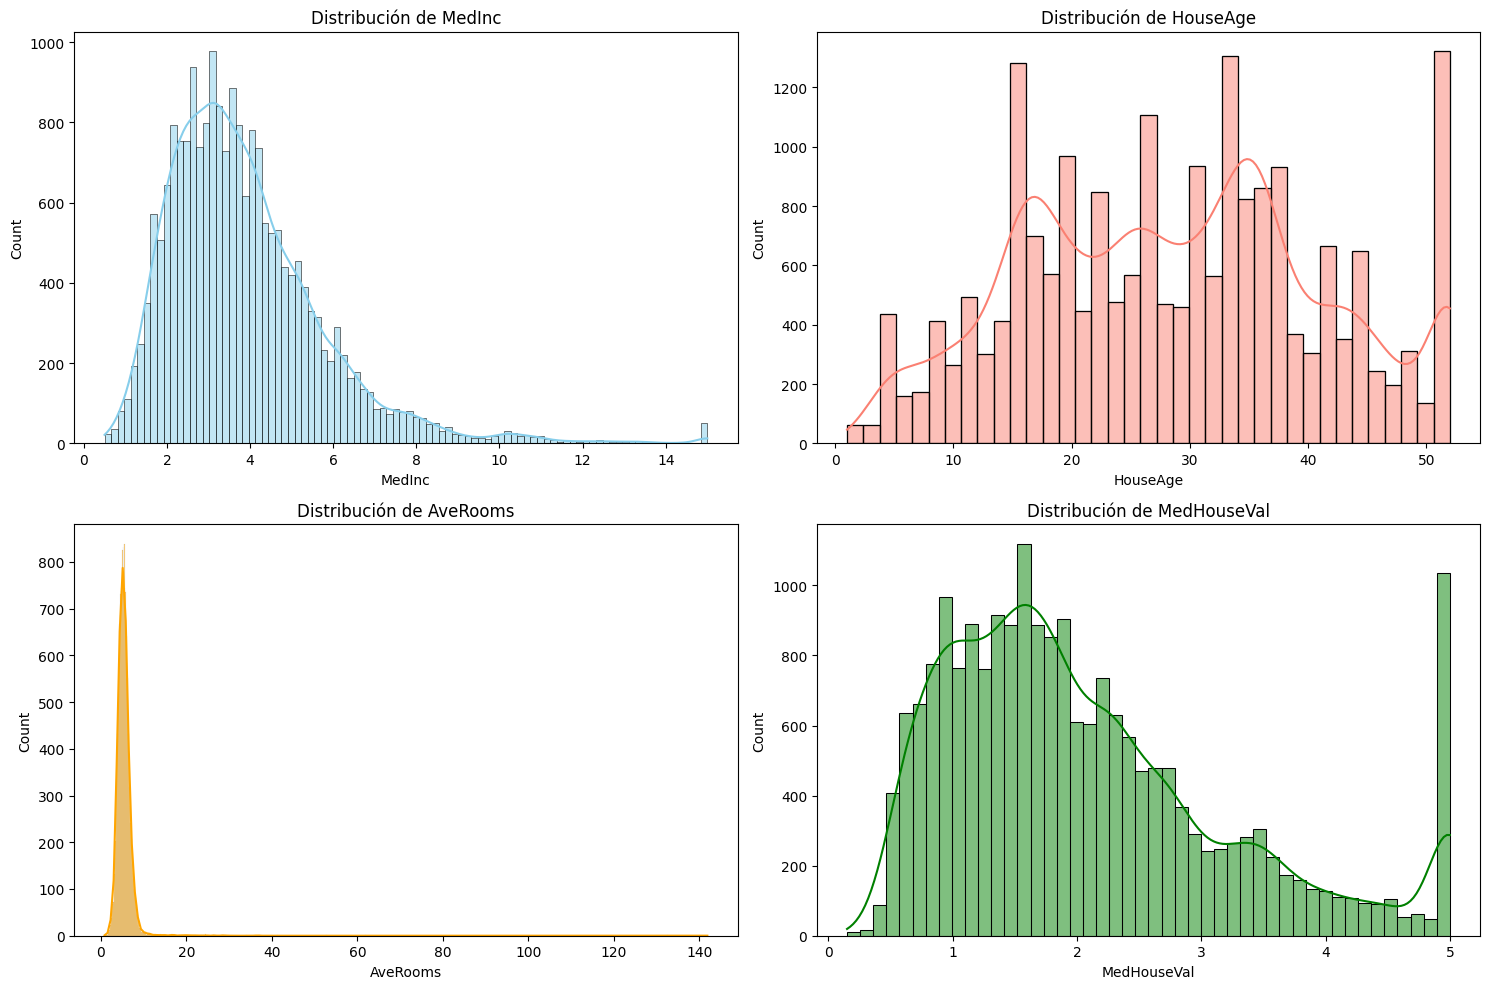

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la distribución de las variables MedInc, HouseAge, AveRooms y MedHouseVal
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['MedInc'], kde=True, color='skyblue')
plt.title('Distribución de MedInc')

plt.subplot(2, 2, 2)
sns.histplot(df['HouseAge'], kde=True, color='salmon')
plt.title('Distribución de HouseAge')

plt.subplot(2, 2, 3)
sns.histplot(df['AveRooms'], kde=True, color='orange')
plt.title('Distribución de AveRooms')

plt.subplot(2, 2, 4)
sns.histplot(df['MedHouseVal'], kde=True, color='green')
plt.title('Distribución de MedHouseVal')

plt.tight_layout()
plt.show()


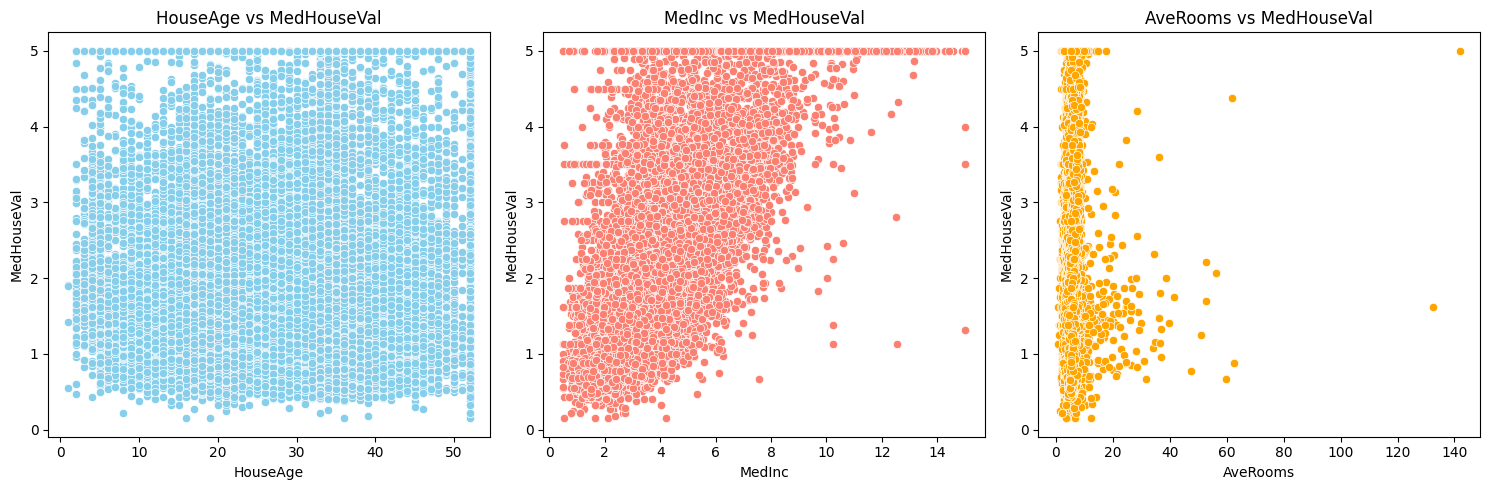

In [19]:
# Graficar relaciones bivariadas entre las variables MedInc, HouseAge, AveRooms y MedHouseVal
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='HouseAge', y='MedHouseVal', data=df, color='skyblue')
plt.title('HouseAge vs MedHouseVal')

plt.subplot(1, 3, 2)
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, color='salmon')
plt.title('MedInc vs MedHouseVal')

plt.subplot(1, 3, 3)
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df, color='orange')
plt.title('AveRooms vs MedHouseVal')

plt.tight_layout()
plt.show()


## Modelos predictivos

(Entrena y evalúa los siguientes modelos sin hacer train/test split o cross validation)

(Esto tiene poco sentido hacerlo en la realidad, pero simplifica el ejercicio)

### Monta un modelo con un solo predictor: `HouseAge`

Y evalúa su performance

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir las variables predictoras y la variable objetivo
X = df[['HouseAge']]
y = df['MedHouseVal']

# Inicializar y ajustar el modelo de regresión lineal
model_house_age = LinearRegression()
model_house_age.fit(X, y)

# Predecir los valores
y_pred_house_age = model_house_age.predict(X)

# Calcular el RMSE
rmse_house_age = np.sqrt(mean_squared_error(y, y_pred_house_age))
print("RMSE del modelo con un solo predictor (HouseAge):", rmse_house_age)


### Monta un modelo con un solo predictor: `MedInc`

Y evalúa su performance

In [ ]:
# Definir las variables predictoras y la variable objetivo
X = df[['MedInc']]
y = df['MedHouseVal']

# Inicializar y ajustar el modelo de regresión lineal
model_med_inc = LinearRegression()
model_med_inc.fit(X, y)

# Predecir los valores
y_pred_med_inc = model_med_inc.predict(X)

# Calcular el RMSE
rmse_med_inc = np.sqrt(mean_squared_error(y, y_pred_med_inc))
print("RMSE del modelo con un solo predictor (MedInc):", rmse_med_inc)


### Monta un modelo con los 3 predictores `MedInc`, `HouseAge`, `AveRooms`

Y evalúa su performance

In [ ]:
# Definir las variables predictoras y la variable objetivo
X = df[['MedInc', 'HouseAge', 'AveRooms']]
y = df['MedHouseVal']

# Inicializar y ajustar el modelo de regresión lineal
model_multi = LinearRegression()
model_multi.fit(X, y)

# Predecir los valores
y_pred_multi = model_multi.predict(X)

# Calcular el RMSE
rmse_multi = np.sqrt(mean_squared_error(y, y_pred_multi))
print("RMSE del modelo con tres predictores (MedInc, HouseAge, AveRooms):", rmse_multi)


### Monta un modelo con todas las variables como predictoras

Y evalúa su performance

In [ ]:
# Definir las variables predictoras y la variable objetivo
X = df.drop(columns=['MedHouseVal'])  # Todas las columnas excepto MedHouseVal
y = df['MedHouseVal']

# Inicializar y ajustar el modelo de regresión lineal
model_all = LinearRegression()
model_all.fit(X, y)

# Predecir los valores
y_pred_all = model_all.predict(X)

# Calcular el RMSE
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all))
print("RMSE del modelo con todas las variables predictoras:", rmse_all)


En qué bloques de casas específicos comete mayor error tu modelo?

In [ ]:
# Calcular los residuos
residuals = y - y_pred_all

# Agregar los residuos al DataFrame
df['Residuals'] = residuals

# Ordenar por valor absoluto de los residuos
sorted_df = df[['MedHouseVal', 'Residuals']].abs().sort_values(by='Residuals', ascending=False)

# Mostrar los bloques de casas con mayores errores
top_errors = sorted_df.head(10)
print("Bloques de casas con mayores errores:")
print(top_errors)


## Train/test split

### Monta un modelo con todas las variables como predictoras y utilizando el paradigma train/test split

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y ajustar el modelo de regresión lineal con todas las variables predictoras
model_train_test_split = LinearRegression()
model_train_test_split.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred_test = model_train_test_split.predict(X_test)

# Calcular el RMSE en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE del modelo utilizando train/test split:", rmse_test)
